<a href="https://colab.research.google.com/github/kaika02/decision-tree/blob/main/dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset
data = pd.read_csv('data_drug.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
data["Drug"] = pd.factorize(data.Drug)[0]

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,1
2,47,1,0,1,10.114,1
3,28,0,1,1,7.798,2
4,61,0,0,1,18.043,0


In [ ]:
#Mengubah dataFrame ke array Numpy
data = data.to_numpy()

In [ ]:
print(data)

[[23.     0.     2.     1.    25.355  0.   ]
 [47.     1.     0.     1.    13.093  1.   ]
 [47.     1.     0.     1.    10.114  1.   ]
 ...
 [52.     1.     1.     1.     9.894  2.   ]
 [23.     1.     1.     0.    14.02   2.   ]
 [40.     0.     0.     0.    11.349  2.   ]]


In [ ]:
#Membagi Dataset => 150 baris data untuk training dan 50 baris data untuk testing
dataTraining = np.concatenate((data[0:75, :], data[125:200, :]), 
                              axis=0)
dataTesting = np.concatenate((data[75:100, :], data[175:200, :]), 
                             axis=0)

In [ ]:
len(dataTraining)

150

In [ ]:
len(dataTesting)

50

In [ ]:
#Membuat Objek Model Decision Tree
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0)

In [ ]:
#Mentraining Model Decision Tree
model = decisiontree.fit(x, y)

In [ ]:
test = model.predict(x)

In [ ]:
test

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [ ]:
#Mengambil sampel observasi dan membuat prediksi
#Sampel berupa data dimensi kelopak
#Fungsi predict() => memeriksa kelas yang dimilikinya
#Fungsi predict_proba() => memeriksa probabilitas kelas dari prediksi tersebut
observation = [[5, 4, 3, 2, 1]]
model.predict(observation)
model.predict_proba(observation)

print(observation)
print(model.predict(observation))

[[5, 4, 3, 2, 1]]
['drugA']


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, test)
print(cm)

[[23  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 54  0]
 [ 0  0  0  0 91]]


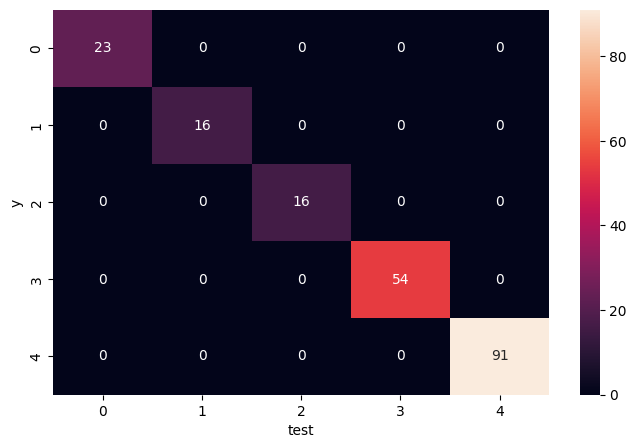

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y, test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("test")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y, test))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        23
       drugB       1.00      1.00      1.00        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      1.00      1.00        54
       drugY       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



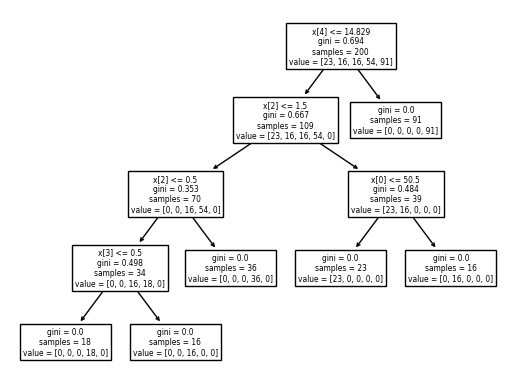

In [ ]:
tree.plot_tree(decisiontree)
plt.show()

**Membuat Model Decision Tree**

In [ ]:
#Memecah Dataset ke Input dan Label
inputTraining = dataTraining[:, 0:5]
inputTesting = dataTesting[:, 0:5]
labelTraining = dataTraining[:, 5]
labelTesting = dataTesting[:, 5]

In [ ]:
#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [ ]:
#Mentraining Model
model = model.fit(inputTraining, labelTraining)

In [ ]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya : ", labelTesting)
print("Hasil Prediksi : ", hasilPrediksi)

Label Sebenarnya :  [0. 3. 0. 3. 2. 4. 2. 1. 3. 1. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 3. 0. 0. 0. 0. 2. 2. 0. 0. 0. 4. 3. 0. 0. 0. 3. 0. 1. 0. 1. 1. 2.
 2. 2.]
Hasil Prediksi :  [0. 3. 0. 3. 2. 4. 2. 1. 3. 1. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 3. 0. 0. 0. 0. 2. 2. 0. 0. 0. 4. 3. 0. 0. 0. 3. 0. 1. 0. 1. 1. 2.
 2. 2.]


In [ ]:
#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 50 data
Prediksi Salah : 0 data
Akurasi : 100.0 %
